In [ ]:
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.5 MB/s eta 0:00:00


In [ ]:
# ===============================================
# 1. Import Libraries
# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
import gradio as gr

In [ ]:
# ===============================================
# 2. Load Dataset
# ===============================================
movies = pd.read_csv('https://github.com/THIRUMURUGAN126/Personalized-movie-recommendation-with-AI-Driven-system/raw/main/movies.csv')
ratings = pd.read_csv('https://github.com/THIRUMURUGAN126/Personalized-movie-recommendation-with-AI-Driven-system/raw/main/ratings.csv')

In [ ]:
# ===============================================
# 3. Basic Preprocessing
# ===============================================
# Drop unnecessary columns if any
movies.dropna(inplace=True)
ratings.dropna(inplace=True)

In [ ]:
# Merge datasets
data = pd.merge(ratings, movies, on='movieId')

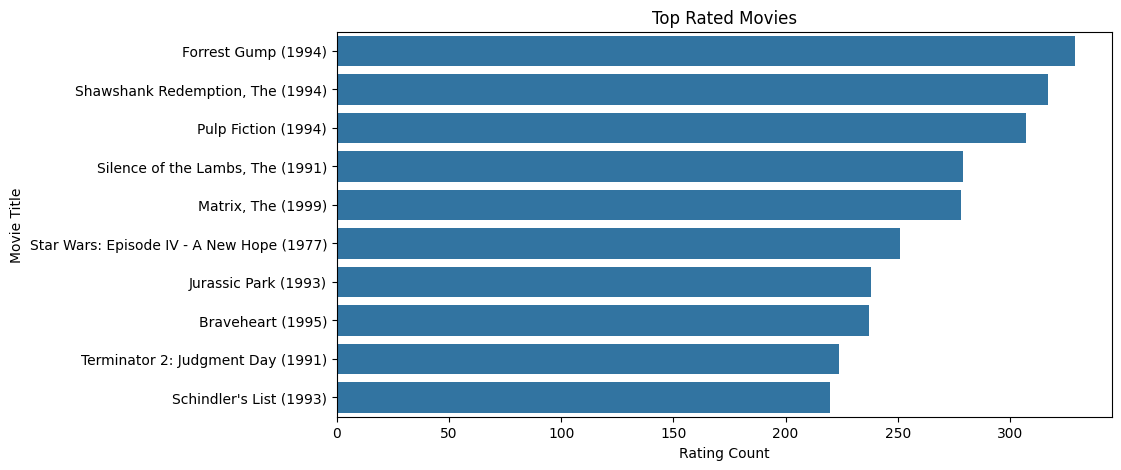

In [ ]:
# ===============================================
# 4. Exploratory Data Analysis
# ===============================================
# Top rated movies by count
top_movies = data['title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_movies.values, y=top_movies.index)
plt.title("Top Rated Movies")
plt.xlabel("Rating Count")
plt.ylabel("Movie Title")
plt.show()

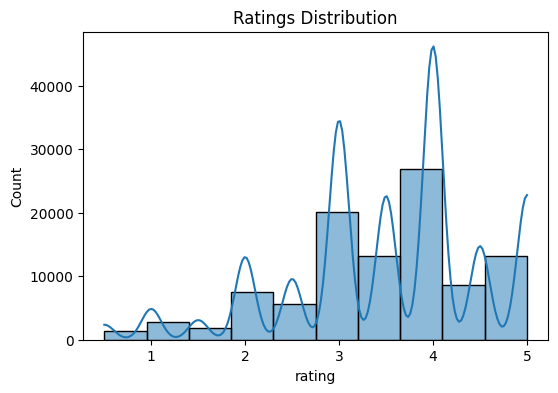

In [ ]:
# Ratings distribution
plt.figure(figsize=(6,4))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title("Ratings Distribution")
plt.show()

In [ ]:
# ===============================================
# 5. Feature Engineering
# ===============================================
# Create user-item matrix
user_item_matrix = data.pivot_table(index='userId', columns='title', values='rating')

In [ ]:
# Fill NaN with 0 for simplicity (can be improved)
user_item_matrix_filled = user_item_matrix.fillna(0)

In [ ]:
# Fill NaN with 0 for simplicity (can be improved)
user_item_matrix_filled = user_item_matrix.fillna(0)

In [ ]:
# Dimensionality reduction (optional)
svd = TruncatedSVD(n_components=20)
matrix_reduced = svd.fit_transform(user_item_matrix_filled)

In [ ]:
# ===============================================
# 6. Similarity Calculation
# ===============================================
item_similarity = cosine_similarity(user_item_matrix_filled.T)
similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [ ]:
# ===============================================
# 7. Recommendation Function
# ===============================================
def recommend_movies(movie_title, top_n=5):
    if movie_title not in similarity_df:
        return ["Movie not found in database."]
    sim_scores = similarity_df[movie_title].sort_values(ascending=False)[1:top_n+1]
    return list(sim_scores.index)

In [ ]:
# ===============================================
# 8. Gradio App Deployment
# ===============================================
def gradio_recommend(movie):
    recommendations = recommend_movies(movie)
    return "\n".join(recommendations)

movie_list = list(user_item_matrix.columns)

interface = gr.Interface(
    fn=gradio_recommend,
    inputs=gr.Dropdown(choices=movie_list, label="Select a Movie"),
    outputs="text",
    title="🎬 AI Movie Recommender",
    description="Select a movie to get personalized AI-driven recommendations!"
)

In [ ]:
# ===============================================
# 9. Launch Gradio App
# ===============================================
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://63b3ffad7043759eef.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
